In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, InputLayer, BatchNormalization
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers, Sequential

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
train_dir = '/content/drive/MyDrive/Colab Notebooks/Dataset/Image Detection/Dataset/Train'
validation_dir = '/content/drive/MyDrive/Colab Notebooks/Dataset/Image Detection/Dataset/Test'
plasmodium_path = '/content/drive/MyDrive/Colab Notebooks/plasmodium-phonecamera'

In [5]:
batch_size = 32
img_height = 128
img_width = 128

In [6]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='binary',
    class_names=['infected', 'uninfected'])

Found 416 files belonging to 2 classes.


In [35]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    validation_dir,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='binary',
    class_names=['infected', 'uninfected'])

Found 134 files belonging to 2 classes.


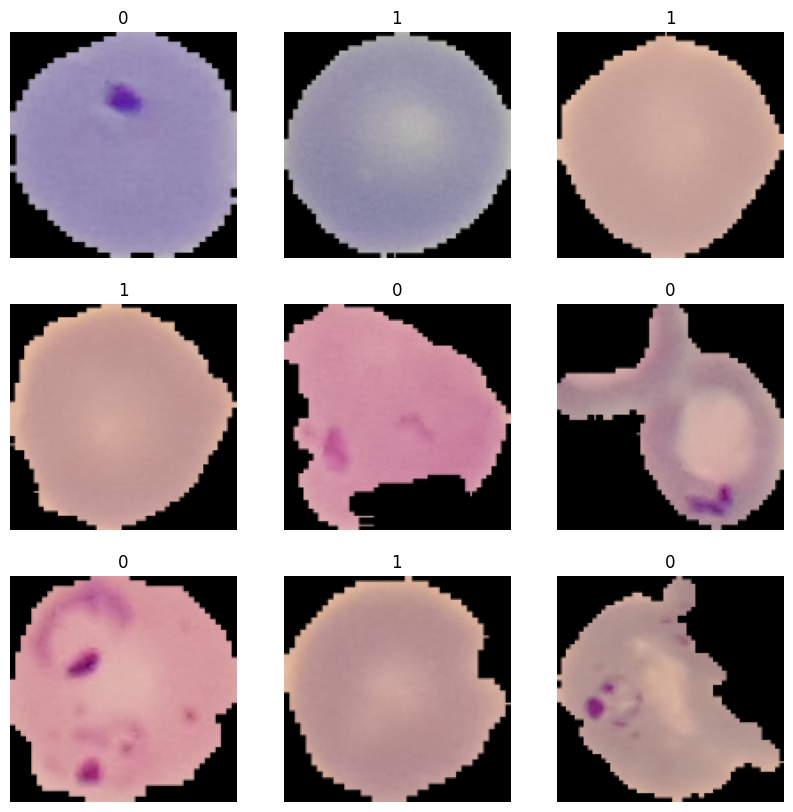

In [8]:
# Visualise the Training Dataset
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(int(labels[i]))
    plt.axis("off")

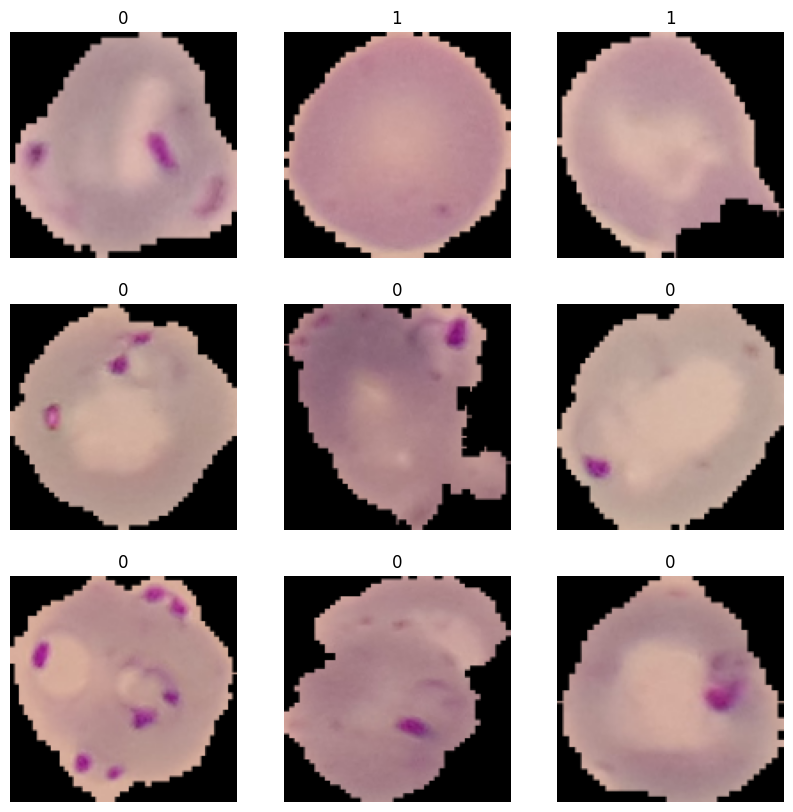

In [9]:
# Visualise the Validation Dataset
plt.figure(figsize=(10, 10))
for images, labels in val_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(int(labels[i]))
    plt.axis("off")

In [10]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 128, 128, 3)
(32, 1)


In [11]:
#Standardise the data
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

In [12]:
# Configure the dataset for performance
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [13]:
# Train Model
num_classes = 2

data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

model = tf.keras.Sequential([
  data_augmentation,
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  layers.Dropout(0.2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [14]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [20]:
epochs=5
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/5
13/13 [==============================] - 8s 592ms/step - loss: 0.1057 - accuracy: 0.9688 - val_loss: 0.1398 - val_accuracy: 0.9403
Epoch 2/5
13/13 [==============================] - 10s 770ms/step - loss: 0.0623 - accuracy: 0.9832 - val_loss: 0.1823 - val_accuracy: 0.9403
Epoch 3/5
13/13 [==============================] - 10s 810ms/step - loss: 0.0605 - accuracy: 0.9808 - val_loss: 0.3366 - val_accuracy: 0.9030
Epoch 4/5
13/13 [==============================] - 9s 742ms/step - loss: 0.0719 - accuracy: 0.9736 - val_loss: 0.4008 - val_accuracy: 0.9104
Epoch 5/5
13/13 [==============================] - 8s 653ms/step - loss: 0.0645 - accuracy: 0.9832 - val_loss: 0.1632 - val_accuracy: 0.9403


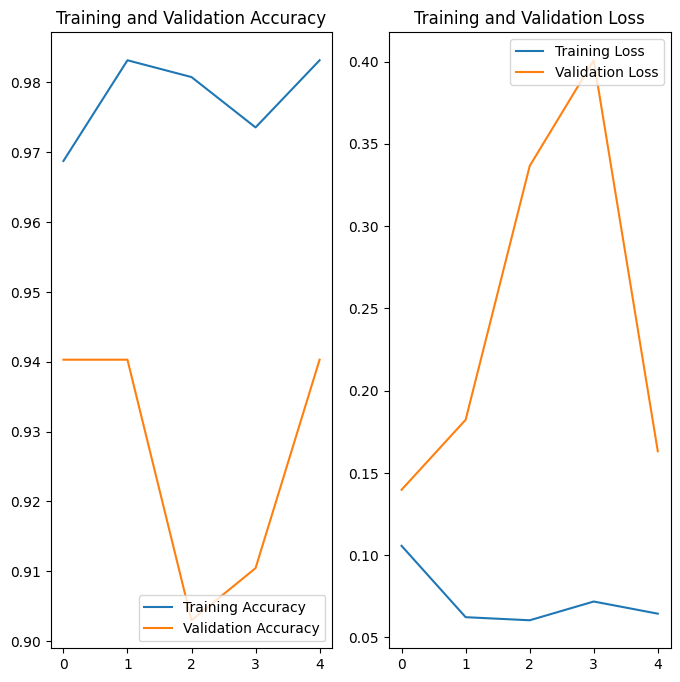

In [21]:
# Visualise training results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()